# NLP - Emotion Classification in Text

### Dataset:
-- https://drive.google.com/file/d/1HWczIICsMpaL8EJyu48ZvRFcXx3_pcnb/view?usp=drive_link


### Importing Libraries


In [35]:
# libraries for EDA and visualization
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.options.mode.copy_on_write = True

### 1. Loading and Preprocessing


In [40]:
# loading dataset
data = pd.read_csv(r"C:\Users\nafla\Downloads\nlp_dataset.csv")
data

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [41]:
data.shape

(5937, 2)

In [42]:
data.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [43]:
data.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [45]:
# missing values
missing_values = data.isnull().sum()
missing_values

Comment    0
Emotion    0
dtype: int64

no missing values

In [46]:
data.nunique()

Comment    5934
Emotion       3
dtype: int64

Here 3 categories of emotions  and 5934 unique values in Comment.

In [47]:
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows:{num_duplicates}")

Number of duplicate rows:0


In [48]:
# Check duplicated comments
data[data['Comment'].duplicated(keep=False)]

,Comment,Emotion
986,i resorted to yesterday the post peak day of i...,anger
1930,i resorted to yesterday the post peak day of i...,fear
2262,i feel like a tortured artist when i talk to her,anger
2877,i feel pretty tortured because i work a job an...,anger
4869,i feel pretty tortured because i work a job an...,fear
5870,i feel like a tortured artist when i talk to her,fear


In [49]:
data = data.drop_duplicates(subset='Comment')
print(f"Shape after removing duplicates: {data.shape}")

Shape after removing duplicates: (5934, 2)


In [50]:
# Reset index after removing duplicates
data.reset_index(drop=True, inplace=True)

In [51]:
# the counts of unique emotions
emotion_counts = data['Emotion'].value_counts()
emotion_counts

Emotion
anger    2000
joy      2000
fear     1934
Name: count, dtype: int64

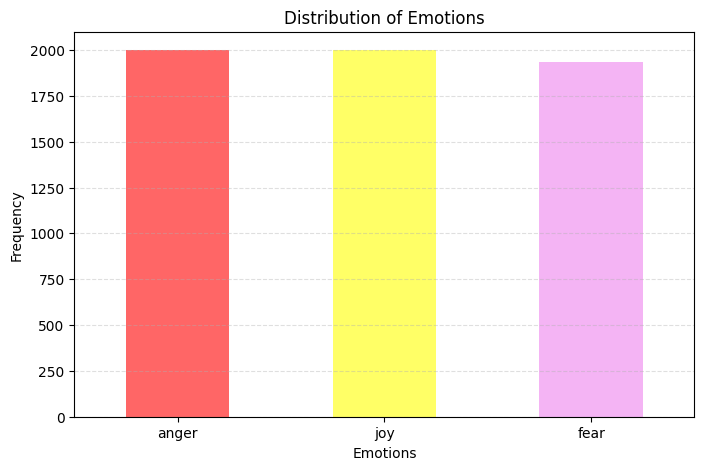

In [52]:
import matplotlib.pyplot as plt
# Plot the bar chart
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color=['red', 'yellow', 'violet'], alpha=0.6)
plt.title("Distribution of Emotions", fontsize=12)
plt.xlabel("Emotions", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)

### Data Preprocessing


In [53]:
import string

In [54]:
# Remove punctuation from the 'Comment' column
data.loc[:, 'Comment'] = data['Comment'].str.replace(f'[{string.punctuation}]', '', regex=True)

# Remove punctuation from the 'Emotion' column
data.loc[:, 'Emotion'] = data['Emotion'].str.replace(f'[{string.punctuation}]', '', regex=True)

data[['Comment', 'Emotion']].head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [55]:
# Check Comments having any upper case letters
data[data['Comment'].str.contains(r'[A-Z]')]

,Comment,Emotion


In [56]:
# Convert the 'Comment' column to lowercase safely
data.loc[:, 'Cleaned_Comment'] = data['Comment'].str.lower()
print("Text cleaned: Converted 'Comment' to lowercase.")
print("Lowercase conversion completed!")

Text cleaned: Converted 'Comment' to lowercase.
Lowercase conversion completed!


### Tokenization

In [57]:
#Tokenization
from nltk.tokenize import word_tokenize
import nltk


In [58]:
data.loc[:, 'Cleaned_comment'] = data['Comment'].apply(word_tokenize)
print("Tokenization completed!")
data[['Comment', 'Cleaned_comment']].head()

Tokenization completed!


,Comment,Cleaned_comment
0,i seriously hate one subject to death but now ...,"[i, seriously, hate, one, subject, to, death, ..."
1,im so full of life i feel appalled,"[im, so, full, of, life, i, feel, appalled]"
2,i sit here to write i start to dig out my feel...,"[i, sit, here, to, write, i, start, to, dig, o..."
3,ive been really angry with r and i feel like a...,"[ive, been, really, angry, with, r, and, i, fe..."
4,i feel suspicious if there is no one outside l...,"[i, feel, suspicious, if, there, is, no, one, ..."


In [59]:
#Sentence tokenization
from nltk.tokenize import sent_tokenize

In [60]:
data.loc[:, 'Cleaned_sentences'] = data['Comment'].apply(sent_tokenize)

# Print the first few rows to check
data[['Comment', 'Cleaned_sentences']].head()

,Comment,Cleaned_sentences
0,i seriously hate one subject to death but now ...,[i seriously hate one subject to death but now...
1,im so full of life i feel appalled,[im so full of life i feel appalled]
2,i sit here to write i start to dig out my feel...,[i sit here to write i start to dig out my fee...
3,ive been really angry with r and i feel like a...,[ive been really angry with r and i feel like ...
4,i feel suspicious if there is no one outside l...,[i feel suspicious if there is no one outside ...


### Stopword Removal

In [61]:
#Stopword Removal
from nltk.corpus import stopwords

In [62]:
stop_words = set(stopwords.words('english') + ['im', 'ive', 'also'])

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

data.loc[:,'Cleaned_comment'] = data['Cleaned_comment'].apply(remove_stopwords)
print("Stopword removal completed!")

Stopword removal completed!


In [63]:
# Print the first few rows to check
data[['Comment', 'Cleaned_comment', ]].head()

,Comment,Cleaned_comment
0,i seriously hate one subject to death but now ...,"[seriously, hate, one, subject, death, feel, r..."
1,im so full of life i feel appalled,"[full, life, feel, appalled]"
2,i sit here to write i start to dig out my feel...,"[sit, write, start, dig, feelings, think, afra..."
3,ive been really angry with r and i feel like a...,"[really, angry, r, feel, like, idiot, trusting..."
4,i feel suspicious if there is no one outside l...,"[feel, suspicious, one, outside, like, rapture..."


### Stemming and Lemmatization

In [64]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()

In [65]:
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

data.loc[:, 'Stemmed_Tokens'] =  data['Cleaned_comment'].apply(stem_tokens)
print("Stemming completed!")

Stemming completed!


In [66]:
data[['Cleaned_comment', 'Stemmed_Tokens']].head()

,Cleaned_comment,Stemmed_Tokens
0,"[seriously, hate, one, subject, death, feel, r...","[serious, hate, one, subject, death, feel, rel..."
1,"[full, life, feel, appalled]","[full, life, feel, appal]"
2,"[sit, write, start, dig, feelings, think, afra...","[sit, write, start, dig, feel, think, afraid, ..."
3,"[really, angry, r, feel, like, idiot, trusting...","[realli, angri, r, feel, like, idiot, trust, f..."
4,"[feel, suspicious, one, outside, like, rapture...","[feel, suspici, one, outsid, like, raptur, hap..."


In [67]:
lemmatizer = WordNetLemmatizer()

In [68]:
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply the function to the 'Cleaned_comment' column
data.loc[:, 'Processed_Comment'] = data['Cleaned_comment'].apply(lemmatize_tokens)
print("Lemmatization completed!")

# Check the processed data
data[['Cleaned_comment', 'Processed_Comment']].head()

Lemmatization completed!


,Cleaned_comment,Processed_Comment
0,"[seriously, hate, one, subject, death, feel, r...","[seriously, hate, one, subject, death, feel, r..."
1,"[full, life, feel, appalled]","[full, life, feel, appalled]"
2,"[sit, write, start, dig, feelings, think, afra...","[sit, write, start, dig, feeling, think, afrai..."
3,"[really, angry, r, feel, like, idiot, trusting...","[really, angry, r, feel, like, idiot, trusting..."
4,"[feel, suspicious, one, outside, like, rapture...","[feel, suspicious, one, outside, like, rapture..."


In [69]:
# Convert tokens back to string for vectorization
data['Processed_Comment'] = data['Processed_Comment'].apply(lambda x: ' '.join(x))

# Check if 'Processed_Comment' exists in the DataFrame
print(data.columns)  # Check columns to ensure 'Processed_Comment' exists


Index(['Comment', 'Emotion', 'Cleaned_Comment', 'Cleaned_comment',
       'Cleaned_sentences', 'Stemmed_Tokens', 'Processed_Comment'],
      dtype='object')


### 2. Feature Extraction

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [80]:
# Bag of Words (BoW) method (CountVectorizer method )
vectorizer = CountVectorizer()

In [83]:
bow_matrix = vectorizer.fit_transform(data['Processed_Comment'])

In [84]:
bow_array = bow_matrix.toarray()
print(bow_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [85]:
bow_vocabulary = vectorizer.get_feature_names_out()
print(bow_vocabulary.tolist())

['aa', 'aac', 'aaron', 'ab', 'abandon', 'abandoned', 'abandonment', 'abbigail', 'abc', 'abdomen', 'abelard', 'abide', 'ability', 'abit', 'able', 'abnormally', 'abound', 'abroad', 'abruptly', 'absence', 'absolute', 'absolutely', 'absolutly', 'absorbed', 'abstract', 'absurdity', 'abuse', 'abusive', 'abyss', 'academia', 'academic', 'accelerated', 'accent', 'accentuating', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessory', 'accident', 'accidentally', 'acclimated', 'accommodation', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accordance', 'according', 'account', 'accounted', 'acctually', 'accumulate', 'accumulated', 'accumulation', 'accurate', 'accustomed', 'ache', 'acheivment', 'achieve', 'achieved', 'achievement', 'achieving', 'aching', 'acknowledge', 'acknowledgment', 'acne', 'aconfident', 'acquainted', 'acronym', 'across', 'act', 'acted', 'acting', 'action', 'active', 'actively', 'activism', 'activist', 'act

### 3. Model Development

In [87]:
#Train Test Split

In [89]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [90]:
# Fit and transform the cleaned comments into numerical features
X = vectorizer.fit_transform(data['Processed_Comment'])

# Target variable: 'Emotion'
y = data['Emotion']

In [91]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Check the shape of the feature matrices and labels
print("X_train shape:", X_train.shape)
print("y_train shape:", len(y_train))  # or y_train.shape
print("X_test shape:", X_test.shape)
print("y_test shape:", len(y_test))  # or y_test.shape

X_train shape: (4747, 7969)
y_train shape: 4747
X_test shape: (1187, 7969)
y_test shape: 1187


In [93]:
print("Shape of bow_matrix:", bow_matrix.shape)  # Should be (number of samples, number of features)
print("Length of data['Emotion']:", len(data['Emotion']))  # Should match the number of samples in bow_matrix

Shape of bow_matrix: (5934, 7969)
Length of data['Emotion']: 5934


#### A) Naive Bayes

In [94]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [95]:
y_pred = nb_model.predict(X_test)  # Naive Bayes model trained with bow

Text(0.5, 1.0, 'Confusion Matrix of NB')

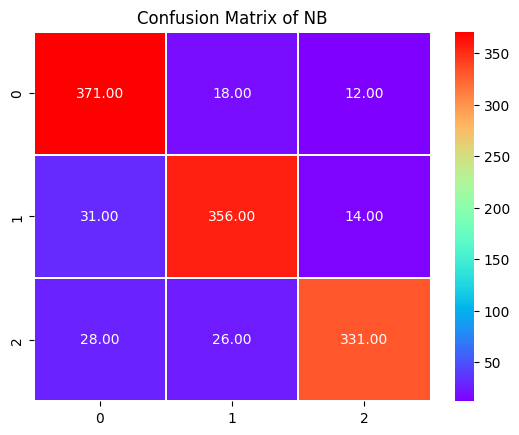

In [97]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, fmt=".2f", cmap="rainbow", linewidths=0.3)
plt.title('Confusion Matrix of NB')

In [98]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Confusion Matrix:


array([[371,  18,  12],
       [ 31, 356,  14],
       [ 28,  26, 331]], dtype=int64)

In [99]:
# Classification report
cr = classification_report(y_test, y_pred)
print("classification_report:")
cr

classification_report:


'              precision    recall  f1-score   support\n\n       anger       0.86      0.93      0.89       401\n        fear       0.89      0.89      0.89       401\n         joy       0.93      0.86      0.89       385\n\n    accuracy                           0.89      1187\n   macro avg       0.89      0.89      0.89      1187\nweighted avg       0.89      0.89      0.89      1187\n'

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.86      0.93      0.89       401
        fear       0.89      0.89      0.89       401
         joy       0.93      0.86      0.89       385

    accuracy                           0.89      1187
   macro avg       0.89      0.89      0.89      1187
weighted avg       0.89      0.89      0.89      1187



In [101]:
# Accuracy score
nb_accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy Score:")
print(nb_accuracy)

Naive Bayes Accuracy Score:
0.8913226621735467


In [102]:
nb_pred = y_pred
nb_pred

array(['joy', 'anger', 'fear', ..., 'fear', 'anger', 'fear'], dtype='<U5')

In [103]:
y_test.values

array(['joy', 'anger', 'anger', ..., 'fear', 'anger', 'anger'],
      dtype=object)

#### B) Support Vector Machine

In [106]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [107]:
# Predictions
y_pred = svm_model.predict(X_test)

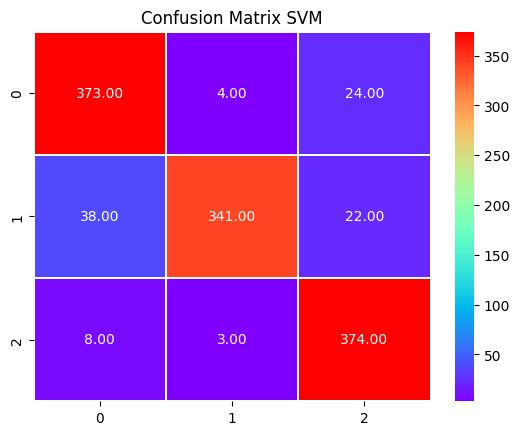

In [109]:
con = confusion_matrix(y_test, y_pred)
sns.heatmap(con, annot=True, fmt=".2f", cmap='rainbow', linewidths=0.3)
plt.title('Confusion Matrix SVM')
plt.show()

In [110]:
cm =  confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
cm

Confusion matrix:


array([[373,   4,  24],
       [ 38, 341,  22],
       [  8,   3, 374]], dtype=int64)

In [111]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.89      0.93      0.91       401
        fear       0.98      0.85      0.91       401
         joy       0.89      0.97      0.93       385

    accuracy                           0.92      1187
   macro avg       0.92      0.92      0.92      1187
weighted avg       0.92      0.92      0.92      1187



In [112]:
# Accuracy score
svm_accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machine Accuracy Score:")
print(svm_accuracy)   

Support Vector Machine Accuracy Score:
0.9165964616680707


In [113]:
svm_pred = y_pred
svm_pred

array(['joy', 'anger', 'anger', ..., 'fear', 'anger', 'anger'],
      dtype=object)

In [114]:
y_test.values

array(['joy', 'anger', 'anger', ..., 'fear', 'anger', 'anger'],
      dtype=object)

### 4. Model Comparison


In [116]:
# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1_score = f1_score(y_test, nb_pred, average='weighted')

In [117]:
# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred, average='weighted')

In [118]:
# Print model evaluation results

print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes F1 Score: {nb_f1_score:.4f}")

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM F1 Score: {svm_f1_score:.4f}")

Naive Bayes Accuracy: 0.8913
Naive Bayes F1 Score: 0.8913
SVM Accuracy: 0.9166
SVM F1 Score: 0.9163


## Evaluation


In [119]:
results = {
    "Model": ["Naive Bayes", "Support Vector Machine (SVM)"],
    "Accuracy": [nb_accuracy, svm_accuracy],
    "F1 Score": [nb_f1_score, svm_f1_score]}


In [120]:
# Convert results into a DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1 Score
0,Naive Bayes,0.891323,0.891313
1,Support Vector Machine (SVM),0.916596,0.916328


## performance level:

#### 1. Naive Bayes Performance:
##### -- Accuracy: 0.8913 (89.13%)
##### -- F1 Score: 0.8913 (89.13%)

#### 2. Support Vector Machine (SVM) Performance:
##### -- Accuracy: 0.9166 (91.66%)
##### -- F1 Score: 0.9163 (91.63%)

#### Observation:

##### -- The SVM model outperforms Naive Bayes by achieving higher accuracy and F1 score.

##### -- Its performance indicates it can better capture the underlying patterns in the dataset.



## Comparison:

##### -- SVM is the superior model based on both accuracy and F1 score.

##### -- SVM's ability to handle complex decision boundaries likely makes it better suited for this emotion classification task, where the data may not be linearly separable.

##### -- Naive Bayes, despite being a simpler model, still performs commendably and may be preferred when computational efficiency is a priority.

## Result Analysis:

##### -- Naive Bayes: Good for tasks where the data distribution aligns well with its assumptions (e.g., word independence). It's lightweight and faster to train.

##### -- SVM: Better for handling high-dimensional data and more complex classification problems. Its use of kernels helps capture intricate relationships, making it more robust for emotion classification.



##### -- SVM is the better choice for this task due to its superior performance. However, Naive Bayes is a viable alternative for quick and reasonably accurate predictions.
